### Figures graphically comparing the accuracy and fairness metrics before and after debiasing models. 

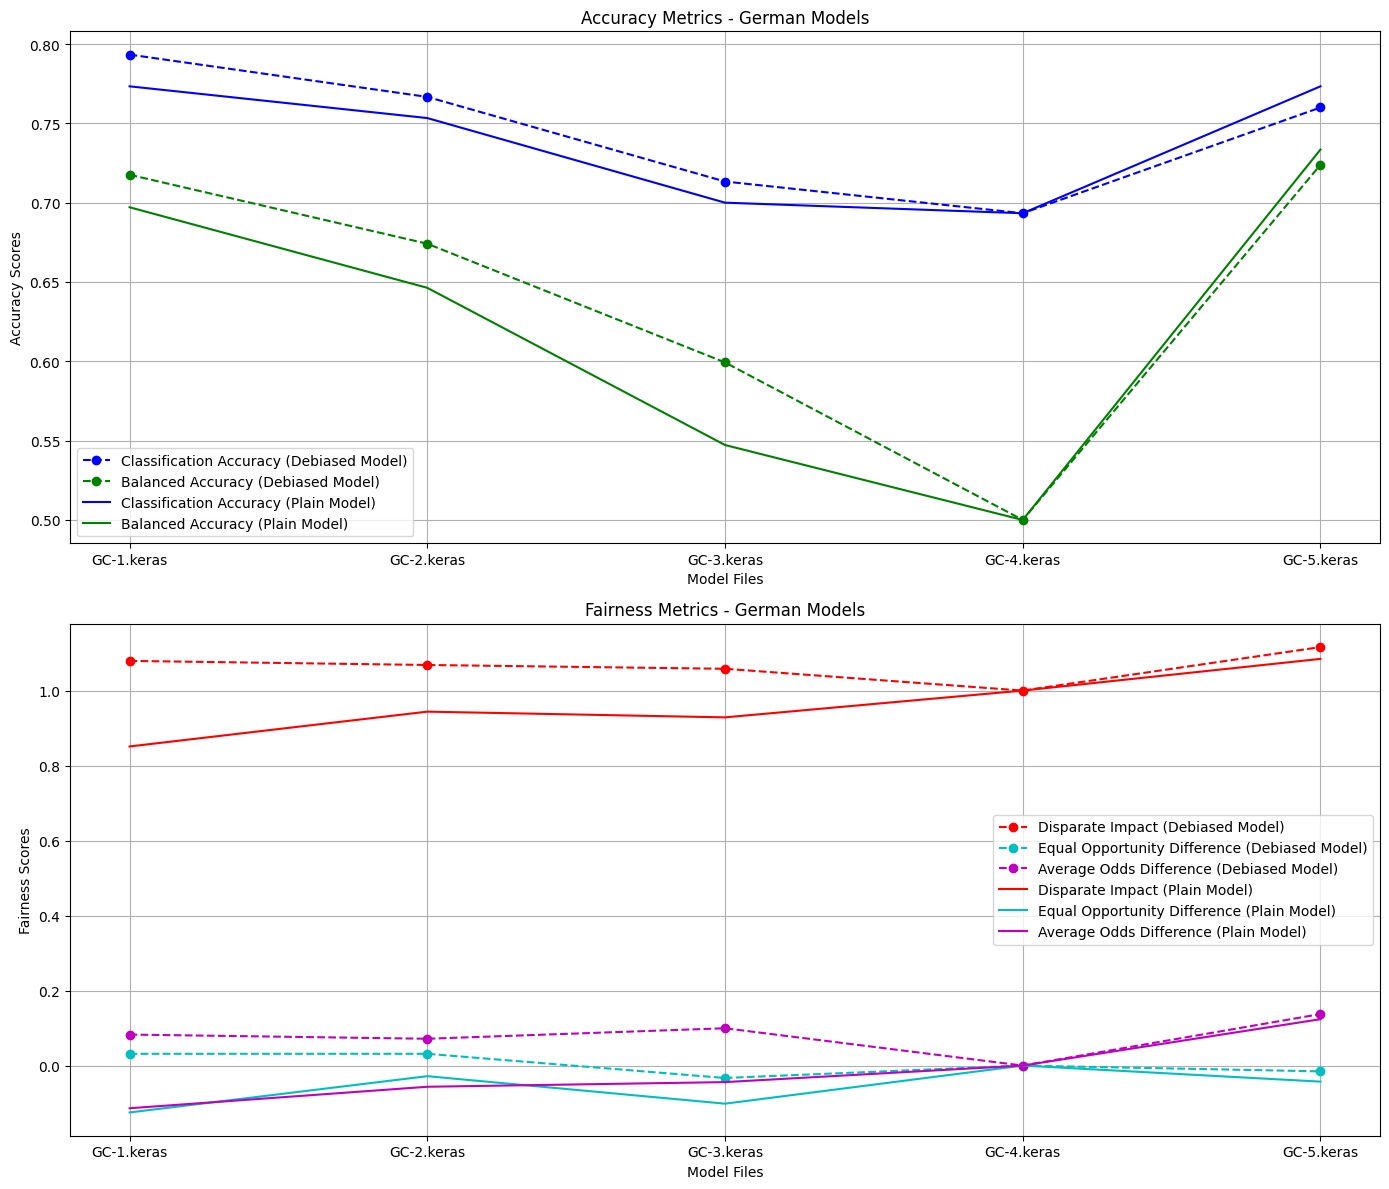

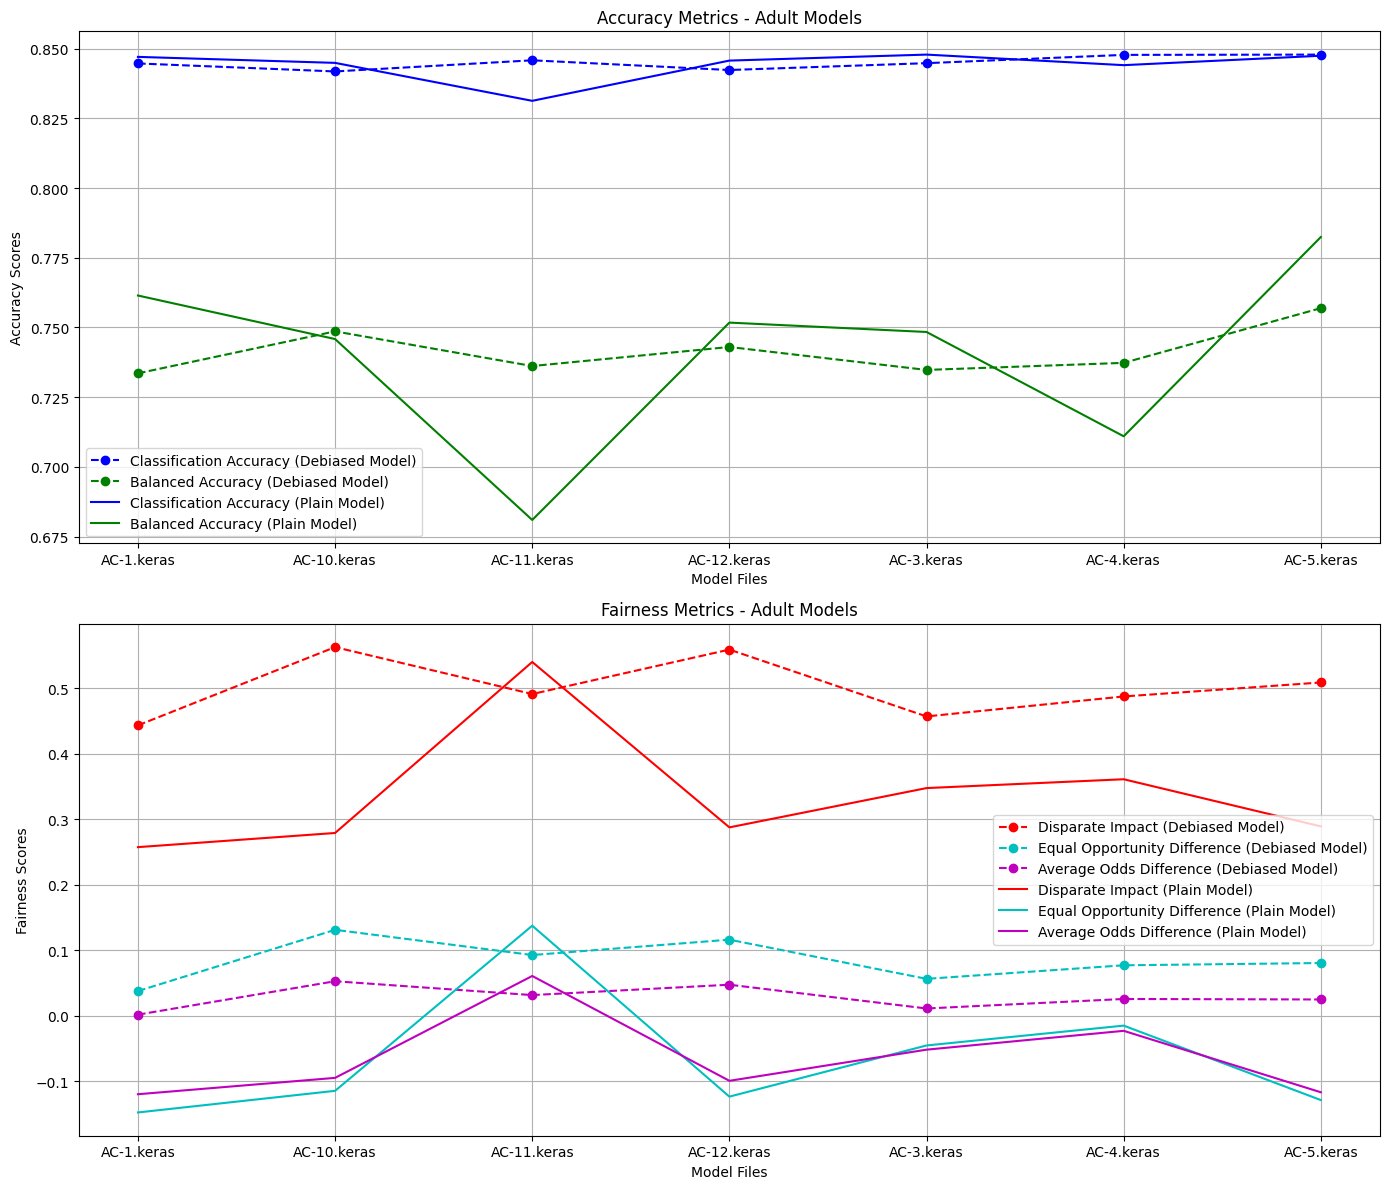

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
german_metrics = pd.read_csv('./model_metrics/german_model_metrics.csv')
adult_metrics = pd.read_csv('./model_metrics/adult_model_metrics.csv')

# Ensure the x-axis is sorted by the available models in the datasets
adult_models = sorted(adult_metrics['Model File'].unique())
german_models = sorted(german_metrics['Model File'].unique())

adult_metrics['Model File'] = pd.Categorical(adult_metrics['Model File'], categories=adult_models, ordered=True)
adult_metrics = adult_metrics.sort_values('Model File')

german_metrics['Model File'] = pd.Categorical(german_metrics['Model File'], categories=german_models, ordered=True)
german_metrics = german_metrics.sort_values('Model File')

# Group by Model File and Model to ensure unique combinations and take the mean of duplicates
german_metrics = german_metrics.groupby(['Model File', 'Model'], observed=True).mean().reset_index()
adult_metrics = adult_metrics.groupby(['Model File', 'Model'], observed=True).mean().reset_index()

# Define a function to plot metrics in subplots
def plot_metrics(df, title):
    fig, axs = plt.subplots(2, 1, figsize=(14, 12))

    models = df['Model'].unique()
    metric_colors = {'Classification Accuracy': 'b', 'Balanced Accuracy': 'g',
                     'Disparate Impact': 'r', 'Equal Opportunity Difference': 'c', 'Average Odds Difference': 'm'}

    for model in models:
        df_model = df[df['Model'] == model]
        df_pivot = df_model.pivot(index='Model File', columns='Model')

        # Plot accuracy metrics
        for metric in ['Classification Accuracy', 'Balanced Accuracy']:
            plain_model = df_pivot[metric].get('Plain Model')
            debiased_model = df_pivot[metric].get('Debiased Model')
            if plain_model is not None:
                axs[0].plot(df_pivot.index, plain_model, label=f'{metric} ({model})', color=metric_colors[metric], linestyle='-')
            if debiased_model is not None:
                axs[0].plot(df_pivot.index, debiased_model, label=f'{metric} ({model})', color=metric_colors[metric], linestyle='--', marker='o')

        # Plot fairness metrics
        for metric in ['Disparate Impact', 'Equal Opportunity Difference', 'Average Odds Difference']:
            plain_model = df_pivot[metric].get('Plain Model')
            debiased_model = df_pivot[metric].get('Debiased Model')
            if plain_model is not None:
                axs[1].plot(df_pivot.index, plain_model, label=f'{metric} ({model})', color=metric_colors[metric], linestyle='-')
            if debiased_model is not None:
                axs[1].plot(df_pivot.index, debiased_model, label=f'{metric} ({model})', color=metric_colors[metric], linestyle='--', marker='o')

    axs[0].set_xlabel('Model Files')
    axs[0].set_ylabel('Accuracy Scores')
    axs[0].set_title(f'Accuracy Metrics - {title}')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].set_xlabel('Model Files')
    axs[1].set_ylabel('Fairness Scores')
    axs[1].set_title(f'Fairness Metrics - {title}')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot all metrics for German dataset
plot_metrics(german_metrics, 'German Models')

# Plot all metrics for Adult dataset
plot_metrics(adult_metrics, 'Adult Models')


### Figures looking at the change in individual fairness between original and debiased models as epsilon (distance metric) is increased. 

/tmp/ipykernel_485179/1948753579.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', n_models)


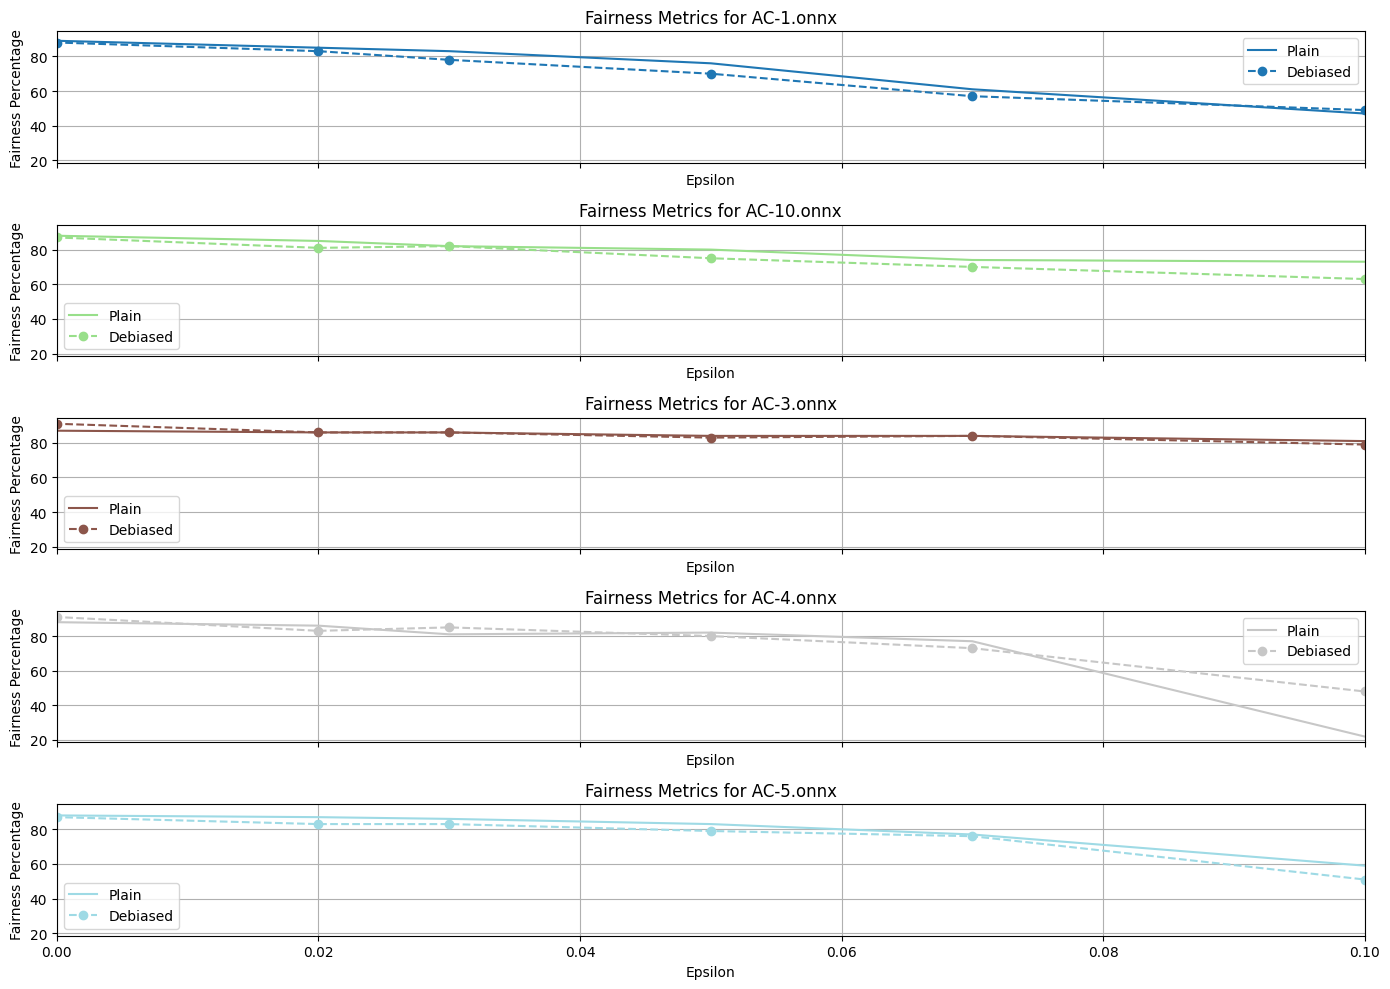

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the new CSV files
debiased_results = pd.read_csv('./results/adult_verify_debiased_results.csv')
plain_results = pd.read_csv('./results/adult_verify_results.csv')

# Define a function to plot fairness metrics for each model in a subplot
def plot_fairness_metrics_subplots():
    models = plain_results['Model'].unique()
    n_models = len(models)
    
    fig, axs = plt.subplots(n_models, 1, figsize=(14, 2 * n_models), sharex=True, sharey=True)
    
    colors = cm.get_cmap('tab20', n_models)
    
    for i, model in enumerate(models):
        # Filter data for the specified model
        plain_data = plain_results[plain_results['Model'] == model]
        debiased_data = debiased_results[debiased_results['Model'] == model]
        
        # Plot FairPercent
        axs[i].plot(plain_data['Epsilon'], plain_data['FairPercent'], label='Plain', color=colors(i), linestyle='-')
        axs[i].plot(debiased_data['Epsilon'], debiased_data['FairPercent'], label='Debiased', color=colors(i), linestyle='--', marker='o')
        
        axs[i].set_title(f'Fairness Metrics for {model}')
        axs[i].grid(True)
        axs[i].set_xlim(0, 0.1)  # Focus x-axis on values between 0 and 0.1
        
        axs[i].set_xlabel('Epsilon')
        axs[i].set_ylabel('Fairness Percentage')
        axs[i].legend()
    
    plt.tight_layout()
    plt.show()

# Plot fairness metrics for each model in subplots
plot_fairness_metrics_subplots()


### Figures comparing inidvidual fairness across varying epsilon values between original and debiased models. Additionally, there is a figure comparing the computation time as well.

Filtered Adult Verify Results:
         Model  Epsilon  FairPercent  NonFairPercent  UnknownPercent  \
2    AC-1.onnx     0.02         85.0            15.0             0.0   
3    AC-1.onnx     0.03         83.0            17.0             0.0   
4    AC-1.onnx     0.05         76.0            24.0             0.0   
5    AC-1.onnx     0.07         61.0            39.0             0.0   
6    AC-1.onnx     0.10         47.0            53.0             0.0   
9   AC-10.onnx     0.02         85.0            15.0             0.0   
10  AC-10.onnx     0.03         82.0            18.0             0.0   
11  AC-10.onnx     0.05         80.0            20.0             0.0   
12  AC-10.onnx     0.07         74.0            26.0             0.0   
13  AC-10.onnx     0.10         73.0            27.0             0.0   
16   AC-3.onnx     0.02         86.0            14.0             0.0   
17   AC-3.onnx     0.03         86.0            14.0             0.0   
18   AC-3.onnx     0.05         8

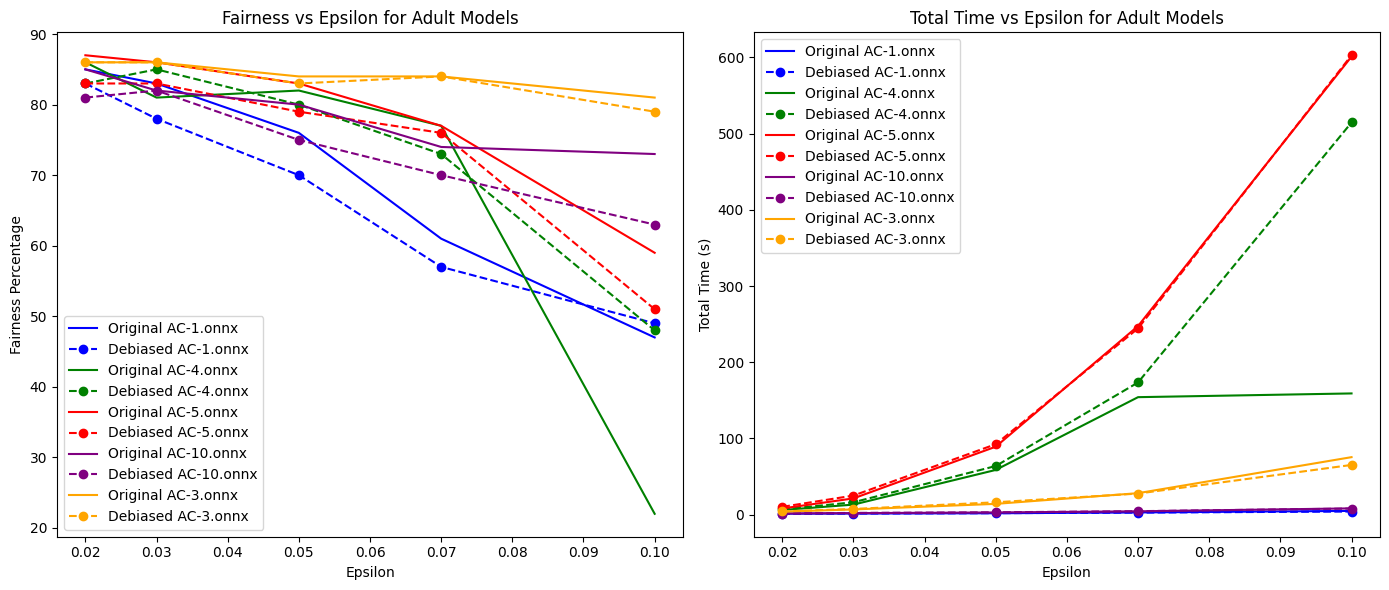

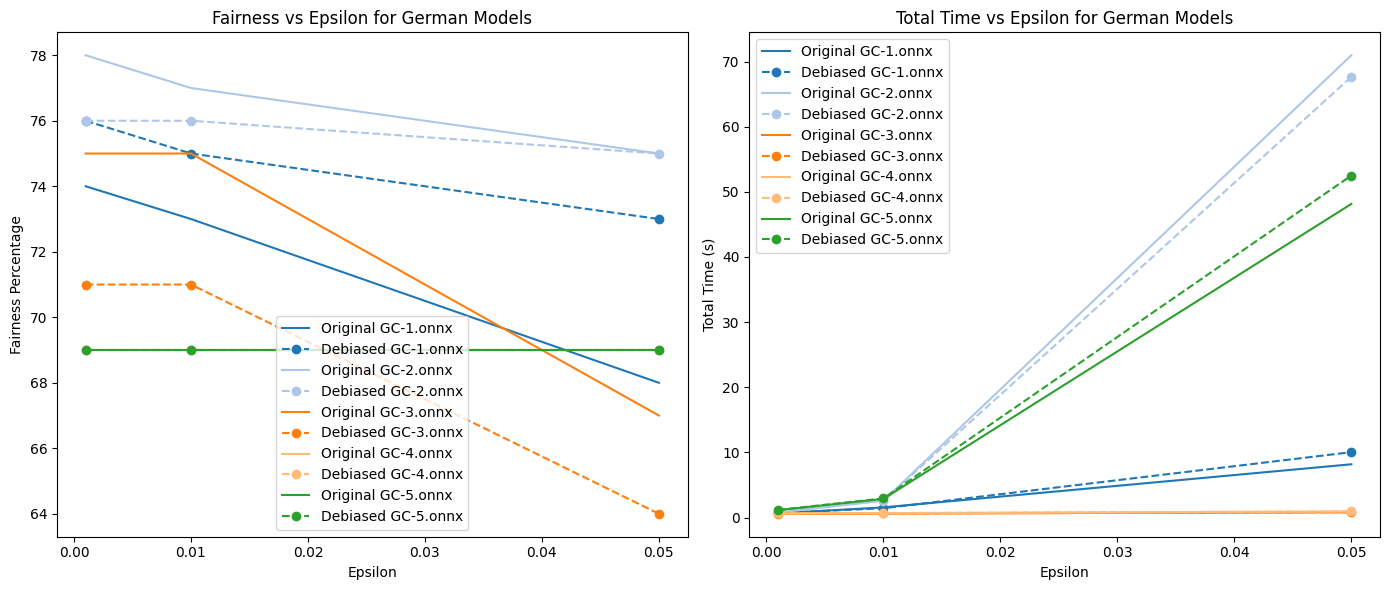

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
german_verify_debiased_results_path = './results/german_verify_debiased_results.csv'
german_verify_results_path = './results/german_verify_results.csv'
adult_verify_debiased_results_path = './results/adult_verify_debiased_results.csv'
adult_verify_results_path = './results/adult_verify_results.csv'

german_verify_debiased_results = pd.read_csv(german_verify_debiased_results_path)
german_verify_results = pd.read_csv(german_verify_results_path)
adult_verify_debiased_results = pd.read_csv(adult_verify_debiased_results_path)
adult_verify_results = pd.read_csv(adult_verify_results_path)

# Filter rows where epsilon is greater than 0.0
german_verify_debiased_results = german_verify_debiased_results[german_verify_debiased_results['Epsilon'] > 0.0]
german_verify_results = german_verify_results[german_verify_results['Epsilon'] > 0.0]
adult_verify_debiased_results = adult_verify_debiased_results[adult_verify_debiased_results['Epsilon'] > 0.0]
adult_verify_results = adult_verify_results[adult_verify_results['Epsilon'] > 0.0]

# Filter the desired models for Adult dataset
desired_adult_models = ['AC-1.onnx', 'AC-4.onnx', 'AC-5.onnx', 'AC-10.onnx', 'AC-3.onnx']
adult_verify_debiased_results_filtered = adult_verify_debiased_results[adult_verify_debiased_results['Model'].isin(desired_adult_models)]
adult_verify_results_filtered = adult_verify_results[adult_verify_results['Model'].isin(desired_adult_models)]

# Print filtered data to debug
print("Filtered Adult Verify Results:")
print(adult_verify_results_filtered)
print("\nFiltered Adult Verify Debiased Results:")
print(adult_verify_debiased_results_filtered)

# Define colors for each model
colors = {
    'AC-1.onnx': 'blue',
    'AC-3.onnx': 'orange',
    'AC-4.onnx': 'green',
    'AC-5.onnx': 'red',
    'AC-10.onnx': 'purple'
}

# Plot for Adult dataset
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for model in desired_adult_models:
    original = adult_verify_results_filtered[adult_verify_results_filtered['Model'] == model]
    debiased = adult_verify_debiased_results_filtered[adult_verify_debiased_results_filtered['Model'] == model]
    
    if original.empty or debiased.empty:
        print(f"No data for model {model}")
        continue
    
    color = colors[model]
    
    # Fairness vs Epsilon
    axs[0].plot(original['Epsilon'], original['FairPercent'], label=f'Original {model}', color=color)
    axs[0].plot(debiased['Epsilon'], debiased['FairPercent'], linestyle='--', marker='o', label=f'Debiased {model}', color=color)
    
    # Time vs Epsilon
    axs[1].plot(original['Epsilon'], original['TotalTime'], label=f'Original {model}', color=color)
    axs[1].plot(debiased['Epsilon'], debiased['TotalTime'], linestyle='--', marker='o', label=f'Debiased {model}', color=color)

axs[0].set_xlabel('Epsilon')
axs[0].set_ylabel('Fairness Percentage')
axs[0].set_title('Fairness vs Epsilon for Adult Models')
axs[0].legend()

axs[1].set_xlabel('Epsilon')
axs[1].set_ylabel('Total Time (s)')
axs[1].set_title('Total Time vs Epsilon for Adult Models')
axs[1].legend()

plt.tight_layout()
plt.show()

# Plot for German dataset
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Define colors for each German model
german_colors = plt.cm.tab20.colors

for i, model in enumerate(german_verify_results['Model'].unique()):
    original = german_verify_results[german_verify_results['Model'] == model]
    debiased = german_verify_debiased_results[german_verify_debiased_results['Model'] == model]
    
    color = german_colors[i % len(german_colors)]
    
    # Fairness vs Epsilon
    axs[0].plot(original['Epsilon'], original['FairPercent'], label=f'Original {model}', color=color)
    axs[0].plot(debiased['Epsilon'], debiased['FairPercent'], linestyle='--', marker='o', label=f'Debiased {model}', color=color)
    
    # Time vs Epsilon
    axs[1].plot(original['Epsilon'], original['TotalTime'], label=f'Original {model}', color=color)
    axs[1].plot(debiased['Epsilon'], debiased['TotalTime'], linestyle='--', marker='o', label=f'Debiased {model}', color=color)

axs[0].set_xlabel('Epsilon')
axs[0].set_ylabel('Fairness Percentage')
axs[0].set_title('Fairness vs Epsilon for German Models')
axs[0].legend()

axs[1].set_xlabel('Epsilon')
axs[1].set_ylabel('Total Time (s)')
axs[1].set_title('Total Time vs Epsilon for German Models')
axs[1].legend()

plt.tight_layout()
plt.show()